### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df =application_df.drop(['EIN', 'NAME'], axis=1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


Before we loop through our variables and encode them using Scikit-learn's OneHotEncoder module,
we need to make sure that none of the categorical variables have more than 10 unique values and if so they  require bucketing.
APPLICATION_TYPE,CLASSIFICATION (ASK_AMTis an int64 not included)  need bucketing 

In [6]:
# Look at APPLICATION_TYPE value counts for binning
#  df['N Months'].value_counts(bins = [0,13, 26, 50])
rappvalue_count = application_df['APPLICATION_TYPE'].value_counts()
rappvalue_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

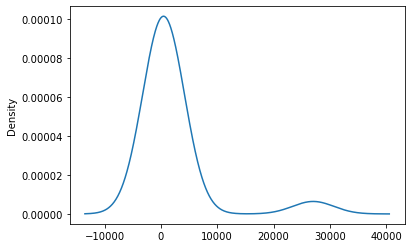

In [7]:
# Visualize the value counts of APPLICATION_TYPE
rappvalue_count.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(rappvalue_count[rappvalue_count<528].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_value_count = application_df['CLASSIFICATION'].value_counts()
classification_value_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C1245        1
C1728        1
C1732        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

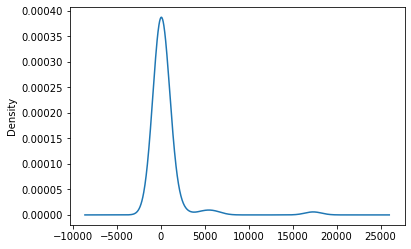

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_value_count.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_value_count[classification_value_count<1883].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Look at INCOME_AMT  value counts for binning
INCOME_AMT_value_count = application_df['INCOME_AMT'].value_counts()
INCOME_AMT_value_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

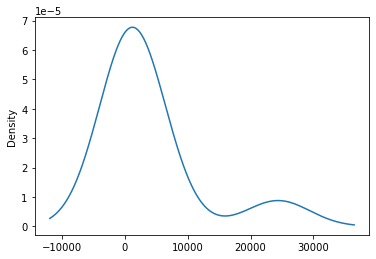

In [13]:
# Visualize the value counts of INCOME_AMT_value_count
INCOME_AMT_value_count.plot.density()

In [14]:
#checking ASK_AMT
application_df.ASK_AMT.describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [15]:
# Generate our categorical variable lists
#  attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL","SPECIAL_CONSIDERATIONS_N"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=86)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
len(X_train_scaled[0])

42

In [22]:
len(X_train[0])

42

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3440      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


Looking at our model summary, we can see that the number of weight parameters (weight coefficients) for each layer equals the number of input values times the number of neurons plus a bias term for each neuron. Our first layer has 42 input values, and multiplied by the eighty neurons (plus eighty bias terms for each neuron) gives us a total of 3440 weight parameters—plenty of opportunities for our model to find trends in the dataset.

If there are eighty neurons in the first layer and thity neurons in the second layer - eighty times thirty equals 2400 parameters, plus thirty parameters for the bias terms, giving us a total of 2430 parameters.

Third layer 30X1 = 30 + 1 = 31 parameters

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 957us/step - loss: 65715.4922 - accuracy: 0.5127
Epoch 2/100
804/804 [==============================] - 1s 944us/step - loss: 69290.5859 - accuracy: 0.4946
Epoch 3/100
804/804 [==============================] - 1s 941us/step - loss: 43788.8594 - accuracy: 0.4942
Epoch 4/100
804/804 [==============================] - 1s 921us/step - loss: 65464.2383 - accuracy: 0.5063
Epoch 5/100
804/804 [==============================] - 1s 929us/step - loss: 52114.1953 - accuracy: 0.5213
Epoch 6/100
804/804 [==============================] - 1s 931us/step - loss: 39048.9805 - accuracy: 0.5289
Epoch 7/100
804/804 [==============================] - 1s 946us/step - loss: 21482.8418 - accuracy: 0.5300
Epoch 8/100
804/804 [==============================] - 1s 954us/step - loss: 2921.2739 - accuracy: 0.5168 0s - loss: 3460.2056 - accuracy
Epoch 9/100
804/804 [==============================] - 1s 984us/step - loss: 33075.8867 - accuracy: 0.5033
Epoch 

Epoch 79/100
804/804 [==============================] - 1s 919us/step - loss: 0.6914 - accuracy: 0.5311
Epoch 80/100
804/804 [==============================] - 1s 916us/step - loss: 0.6914 - accuracy: 0.5311
Epoch 81/100
804/804 [==============================] - 1s 928us/step - loss: 0.6914 - accuracy: 0.5311
Epoch 82/100
804/804 [==============================] - 1s 931us/step - loss: 0.6914 - accuracy: 0.5311
Epoch 83/100
804/804 [==============================] - 1s 924us/step - loss: 0.6915 - accuracy: 0.5311
Epoch 84/100
804/804 [==============================] - 1s 922us/step - loss: 0.6913 - accuracy: 0.5311
Epoch 85/100
804/804 [==============================] - 1s 920us/step - loss: 0.6914 - accuracy: 0.5311
Epoch 86/100
804/804 [==============================] - 1s 937us/step - loss: 0.6913 - accuracy: 0.5311
Epoch 87/100
804/804 [==============================] - 1s 921us/step - loss: 0.6914 - accuracy: 0.5311
Epoch 88/100
804/804 [==============================] - 1s 919us

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6389 - accuracy: 0.6780
Loss: 0.6388726830482483, Accuracy: 0.6780174970626831


# Deliverable 2: Compile, Train and Evaluate the Model Adding Another
#                          Hidden layer

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  70
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 70)                3010      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 7,111
Trainable params: 7,111
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy",
           optimizer="adamax",
           metrics=["accuracy"])

In [47]:
# Train the model
fit_model = nn.fit(X_train_scaled,
                   y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 997us/step - loss: 0.5325 - accuracy: 0.7390
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7391
Epoch 3/200
804/804 [==============================] - 1s 972us/step - loss: 0.5326 - accuracy: 0.7391
Epoch 4/200
804/804 [==============================] - 1s 983us/step - loss: 0.5324 - accuracy: 0.7387
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7391
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7385
Epoch 7/200
804/804 [==============================] - 1s 993us/step - loss: 0.5326 - accuracy: 0.7391
Epoch 8/200
804/804 [==============================] - 1s 986us/step - loss: 0.5326 - accuracy: 0.7392
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7388
Epoch 10/200
804/804 [==============================] - 1s 967us/step - loss: 0.5

804/804 [==============================] - 1s 964us/step - loss: 0.5316 - accuracy: 0.7399
Epoch 159/200
804/804 [==============================] - 1s 946us/step - loss: 0.5317 - accuracy: 0.7397
Epoch 160/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7402
Epoch 161/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7396
Epoch 162/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7398
Epoch 163/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7391
Epoch 164/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7392
Epoch 165/200
804/804 [==============================] - 1s 952us/step - loss: 0.5316 - accuracy: 0.7400
Epoch 166/200
804/804 [==============================] - 1s 970us/step - loss: 0.5316 - accuracy: 0.7397
Epoch 167/200
804/804 [==============================] - 1s 946us/step - loss: 

<AxesSubplot:>

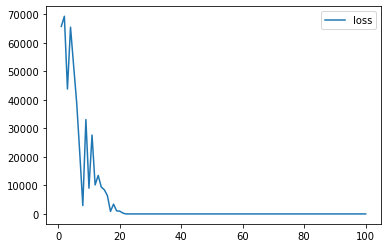

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
#TO READ THE LOSS GRAPH :https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

<AxesSubplot:>

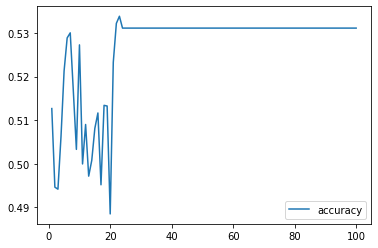

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [50]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization/",exist_ok=True)
checkpoint_path = "checkpoints_optimization/weights.{epoch:02d}.hdf5"

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5697 - accuracy: 0.7369
Loss: 0.5697154998779297, Accuracy: 0.7369096279144287


In [51]:
# Compile the model
nn.compile(loss="binary_crossentropy",
           optimizer="adamax",
           metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,
                   y_train,
                   epochs=100,
                   callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7393

Epoch 00001: saving model to checkpoints_optimization\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 1s 991us/step - loss: 0.5314 - accuracy: 0.7398

Epoch 00002: saving model to checkpoints_optimization\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7394

Epoch 00003: saving model to checkpoints_optimization\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7391

Epoch 00004: saving model to checkpoints_optimization\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7400

Epoch 00005: saving model to checkpoints_optimization\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7396

Epoch 00006: saving model to checkpo

804/804 [==============================] - 1s 984us/step - loss: 0.5312 - accuracy: 0.7397

Epoch 00048: saving model to checkpoints_optimization\weights.48.hdf5
Epoch 49/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7394

Epoch 00049: saving model to checkpoints_optimization\weights.49.hdf5
Epoch 50/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7402

Epoch 00050: saving model to checkpoints_optimization\weights.50.hdf5
Epoch 51/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7400

Epoch 00051: saving model to checkpoints_optimization\weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7399

Epoch 00052: saving model to checkpoints_optimization\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7397

Epoch 00053: saving model to checkpoints_op

In [52]:
# Export model to HDF5 file MAKE SURE TO GIVE A DIFFERENT NAME WHEN RERUN 
nn.save('AlphabetSoupCharity_Optimization.h5')

# Deliverable 3: Compile, Train and Evaluate the Model Adding Hidden layer and changing the activation function 


In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled [0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="LeakyReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 80)                3440      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                4050      
_________________________________________________________________
dense_19 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 41        
Total params: 9,571
Trainable params: 9,571
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy",
           optimizer="adamax",
           metrics=["accuracy"])

In [40]:
# Train the model
fit_model = nn.fit(X_train_scaled,
                   y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5759 - accuracy: 0.7175
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7264
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7269
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7278
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7280
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7282
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7298
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7292
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7296
Epoch 10/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7376
Epoch 160/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7376
Epoch 161/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7385
Epoch 162/200
804/804 [==============================] - 1s 983us/step - loss: 0.5370 - accuracy: 0.7379
Epoch 163/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7376
Epoch 164/200
804/804 [==============================] - 1s 990us/step - loss: 0.5373 - accuracy: 0.7378
Epoch 165/200
804/804 [==============================] - 1s 991us/step - loss: 0.5369 - accuracy: 0.7379
Epoch 166/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5372 - accuracy: 0.7380
Epoch 167/200
804/804 [==============================] - 1s 975us/step - loss: 0.5370 - accuracy: 0.7383
Epoch 168/200
804/804 [==============================] - 1s 1ms/step - loss: 0.

<AxesSubplot:>

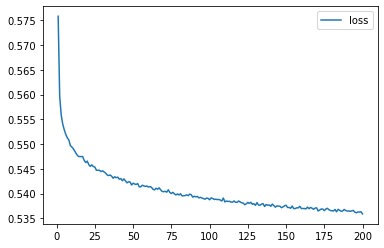

In [41]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

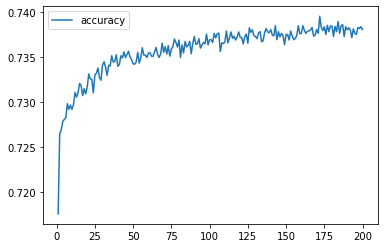

In [42]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5510 - accuracy: 0.7357
Loss: 0.5509674549102783, Accuracy: 0.7357434630393982
